# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercício 1)

Quando comparamos imagens e sinais e suas características, o que devemos considerar a priori?

(a) Sinais possuem valores independente e identicamente distribuídos, enquanto Imagens possuem pixels organizados de forma espacial<br>
(b) Sinais possuem valores codificados em 16 bits, enquanto imagens possuem valores codificados em 8 bits<br>
(c) Sinais possuem valores com dependência sequencial, enquanto imagens não possuem padrão de dependência<br>
(d) Sinais possuem valores com dependência sequencial, enquanto Imagens possuem dependência espacial de seus valores<br>

### Exercício 2)

Sejam sinais representados por 32 bits (int32) e imagens representadas por 16 bits sem sinal (uint16). Quantos valores distintos é possível representar em cada um desses dados?

(a) Sinais: 4,29 Bilhões; Imagens 32,76 Mil<br>
(b) Sinais: 4,29 Bilhões; Imagens 65,53 Mil<br>
(c) Sinais: 2,14 Bilhões; Imagens 32,76 Mil<br>
(d) Sinais: 2,14 Bilhões; Imagens 65,53 Mil<br>

In [6]:
f"{2 ** 32:,} & {2 ** 16:,}"

'4,294,967,296 & 65,536'

### Exercício 3)

Carregue os dados do arquivo `sinais2.csv` utilizando

`signals = np.genfromtxt(arquivo, delimiter=',').astype(np.float32)`.

O array resultante possui um sinal por linha, i.e. `sinal[i]`

Utilizando os sinais carregados utilize a `np.fft.fft()` para obter a Transformada de Fourier dos sinais. Depois, considerando apenas frequências até 50, calcule quais são as 4 frequências de maior valor de magnitude (obtido pelo `np.abs()`). Aqui não queremos os valores da magnitude, mas a quais frequências (índices) elas se referem. Para complementar a análise, plote as magnitudes das transformadas até a frequência 50.

Analisando as frequências de maior magnitude temos as frequências que mais caracterizam o sinal. Considerando as 4 frequências computadas anteriormente, podemos dividir os sinais em categorias distintas. Nesse sentido, qual análise abaixo está correta?

(a) O sinal 4 possui frequências inferiores quando comparado com os demais, indicando que o sinal 4 é provavalmente  dependente sequencialmente, enquanto os demais são i.i.d.; assim podemos dividí-los em duas categorias: sinal 4 e sinais 0, 1, 2 e 3.<br>
(b) O sinal 3 possui frequências mais significativas 20 Hz ou superior, indicando que é um sinal com maior qualidade de aquisição, e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.<br>
(c) Todas as frequências estão abaixo de 50 Hz, sendo assim podemos dizer que os sinais são todos similares, sendo impossível dividí-los em categorias.<br>
(d) O sinal 3 possui frequências mais significativas 20 Hz ou superior, possuindo transições mais rápidas de valores do que os outros com frequências caracerísticas menores do que 12Hz; e assim podemos categorizar em: sinal 3, e sinais 0, 1, 2 e 4.<br>

In [8]:
signals = np.genfromtxt("dados/sinais2.csv", delimiter=',').astype(np.float32)
signals.shape

(5, 9000)

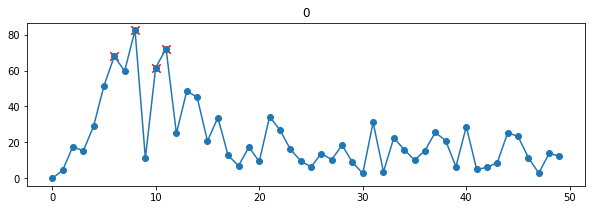

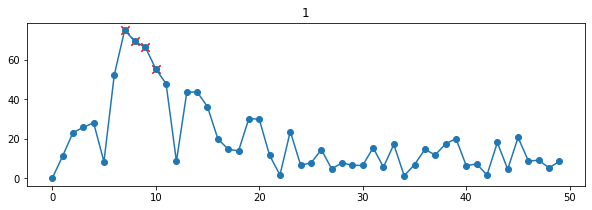

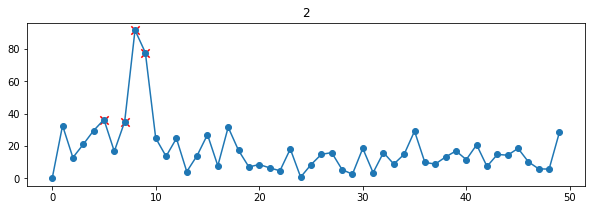

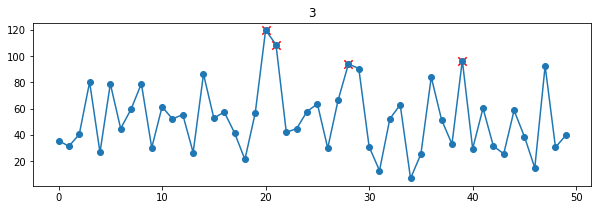

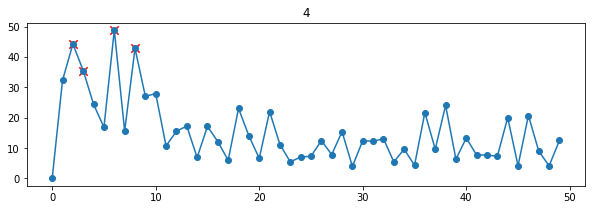

In [43]:
for i in range(len(signals)):
    signal_i = signals[i]
    magnitudes = np.abs(np.fft.fft(signal_i)[:50])
    top_mag_ix = np.argpartition(magnitudes, kth=-4)[-4:]
    plt.figure(figsize=(10, 3))
    plt.plot(np.arange(len(magnitudes)), magnitudes, "o-")
    plt.scatter(top_mag_ix, magnitudes[top_mag_ix], color="red", marker="x", s=70)
    plt.title(str(i))
    plt.show()

### Exercício 4)
 
Considerando os mesmos sinais carregados, compute as características: entropia da energia (com 10 blocos), taxa de cruzamentos por zero, entropia espectral (com 10 blocos), formando um vetor com 3 características para cada sinal.

Após isso, compute a matriz de distâncias entre os sinais considerando a distância L1, i.e., a soma dos valores absolutos das diferenças entre dois vetores $A$ e $B$:

$$\sum_i |A_i - B_i|$$

Da matriz, que indica a dissimilaridade entre pares de sinais, aplique uma soma na direção do eixo 0 (axis=0) e depois arredonde para inteiro `np.round(,0)`. Quais valores foram obtidos para cada sinal?

(a) Sinais 0, 1, 2 e 4, soma 2; Sinal 3, soma 6.<br>
(b) Sinais 0 e 4, soma 3; Sinais 1 e 2, soma 2; Sinal 3, soma 6.<br>
(c) Sinais 0, 1, e 2, soma 2; Sinal 3, soma 6; Sinal 4, soma 3.<br>
(d) Sinais 0, 1, e 2, soma 1; Sinal 3, soma 3; Sinal 4, soma 6.<br>

In [46]:
def taxa_cruzamentos_por_zero(sinal):
    '''Cruzamentos por zero em um intervalo de tempo '''
    M = len(sinal)
    cont_zero = np.sum(np.abs(np.diff(np.sign(sinal)))) / 2
    return np.float64(cont_zero) / np.float64(M - 1.0)

def entropia_energia(sinal, n_blocos=10):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

def entropia_espectral(sinal, n_blocos=10):
    """Computes the spectral entropy"""
    
    fft_abs = np.abs(np.fft.fft(sinal))
    
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)

    return entropia_esp

In [48]:
X = np.zeros((len(signals), 3))
for i in range(len(signals)):
    signal_i = signals[i]
    X[i, :] = (
        taxa_cruzamentos_por_zero(signal_i),
        entropia_energia(signal_i),
        entropia_espectral(signal_i),        
    )
X

array([[0.11401267, 3.16539764, 2.29342952],
       [0.13434826, 3.12377763, 2.3196781 ],
       [0.10201133, 3.0719614 , 2.35270391],
       [0.49227692, 3.31958556, 3.3196544 ],
       [0.20535615, 2.84564829, 2.44417735]])

In [50]:
X_dist = np.zeros((len(signals), len(signals)))
for i in range(len(signals)):
    for j in range(len(signals)):
        X_dist[i, j] = np.sum(np.abs(X[i] - X[j]))
X_dist

array([[0.        , 0.08820419, 0.16471197, 1.55867705, 0.56184067],
       [0.08820419, 0.        , 0.11717896, 1.55371289, 0.47363648],
       [0.16471197, 0.11717896, 0.        , 1.60484023, 0.42113137],
       [1.55867705, 1.55371289, 1.60484023, 0.        , 1.63633509],
       [0.56184067, 0.47363648, 0.42113137, 1.63633509, 0.        ]])

In [53]:
X_dist.sum(axis=0).round(0)

array([2., 2., 2., 6., 3.])

### Exercício 5)

Carregue as seguintes imagens da base de dados flickr_map_training:

`
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")`

Implemente um descritor de cor que computa um histograma utilizando a composição dos canais RGB em um único canal utilizando a seguinte operação, sendo R, G e B as matrizes relativas a cada canal de cor:

$$I = R\cdot0.3 +G\cdot0.59 +B\cdot0.11$$

Permita definir o número de bins do histograma por meio da sua função e, antes de retornar, normalize o histograma dividindo pela soma.

Depois, calcule a distância entre img1 carregada e as outras imagens (2, 3, 4, 5) utilizando: 16 bins e 4 bins. Qual foram as duas imagens mais similares, da mais próxima para a mais distante, nos dois casos?

(a) 16 bins: img2, img4 ; 4 bins: img2, img3<br>
(a) 16 bins: img2, img3 ; 4 bins: img4, img3<br>
(b) 16 bins: img2, img3 ; 4 bins: img2, img4<br>
(d) 16 bins: img4, img2 ; 4 bins: img4, img3<br>

In [60]:
import imageio.v3 as imageio
img1 = imageio.imread("dados/flickr_map_training/107.jpg")
img2 = imageio.imread("dados/flickr_map_training/101.jpg")
img3 = imageio.imread("dados/flickr_map_training/112.jpg")
img4 = imageio.imread("dados/flickr_map_training/303.jpg")
img5 = imageio.imread("dados/flickr_map_training/400.jpg")

In [79]:
imgs = [img1, img2, img3, img4, img5]

In [80]:
imgs[0].shape

(417, 640, 3)

In [81]:
def convert_to_grey(img):
    assert (len(img.shape) == 3) and (img.shape[2] == 3), "The image needs 3 color channels"
    return (
        img[:, :, 0] * 0.3
        + img[:, :, 1] * 0.59
        + img[:, :, 2] * 0.11
    )

In [82]:
grey_imgs = [convert_to_grey(img) for img in imgs]

In [83]:
grey_imgs[0].shape

(417, 640)

In [84]:
def histograma_global(img, bins):

    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt(np.sum((A-B)**2) )

In [85]:
def get_best_matches(hist_query, hist_targets):
    distances = [Euclidean_distance(hist_query, hist_t) for hist_t in hist_targets]
    return np.argsort(distances)

In [86]:
n_bins = 16
hist_imgs = [histograma_global(grey_img, bins=n_bins) for grey_img in grey_imgs]
best_matches = get_best_matches(hist_query=hist_imgs[0], hist_targets=hist_imgs[1:])
best_matches + 2

array([2, 4, 3, 5])

In [87]:
n_bins = 4
hist_imgs = [histograma_global(grey_img, bins=n_bins) for grey_img in grey_imgs]
best_matches = get_best_matches(hist_query=hist_imgs[0], hist_targets=hist_imgs[1:])
best_matches + 2

array([2, 3, 4, 5])

### Exercício 6)

Vamos repetir o procedimento da questão anterior, agora utilizando o descritor de texturas LBP visto em aula. Utilizaremos uma função que também realiza uma normalização dos valores máximos das imagens, bem como permite definir o raio, número de pontos e quantidade de bins para esse descritor, conforme abaixo.

Calcule a distância L1 entre img1 carregada e as outras imagens utilizando o descritor LBP com os seguintes parâmetros:
* número de pontos = 14
* raio = 2
* bins = 16

Quais foram as três imagens mais similares, da mais próxima para a mais distante?

(a) img3, img2, img5<br>
(b) img2, img3, img4<br>
(c) img3, img5, img2<br>
(d) img5, img3, img2<br>

In [92]:
from skimage import feature

def lbp_features(img_gray):
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), 14, 2, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 16 + 3), range=(0, 16 + 2))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [93]:
n_bins = 16
hist_imgs = [lbp_features(grey_img) for grey_img in grey_imgs]
best_matches = get_best_matches(hist_query=hist_imgs[0], hist_targets=hist_imgs[1:])
best_matches + 2

array([3, 2, 5, 4])

### Exercício 7)
 
No método Bag-of-Features quais das seguintes escolhas para o *framework* influenciam mais drasticamente a performance do método no caso de uso em imagens?

(a) O tamanho do dicionário, a quantidade de cores nas imagens, a quantidade de classes do problema<br>
(b) O tamanho do dicionário, o descritor base, o método utilizado para aprender o dicionário<br>
(c) O descritor base e o número de componentes principais utilizados<br>
(d) O tamanho do patch extraído da imagem, que deve ser compatível com a resolução das imagens<br>

### Exercício 8)

Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* principais componentes = 10
* tamanho do dicionário = 50

Utilize a imagem de consulta `flower.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Quantas imagens foram recuperadas pertencendo à mesma categoria da consulta?

(a) 3<br>
(b) 0<br>
(c) 6<br>
(d) 9<br>

### Exercício 9)
 
Execute o método Bag-of-Features estudado em aula, agora com os seguintes parâmetros:
* tamanho do patch = (13, 13)
* número de patches = 1000
* tamanho do dicionário = 50
* descritor base = LBP com raio 3, 24 pontos e 16 bins

Vamos usar a versão da função LBP que permite usar como parâmetros o número de pontos e raio.

Utilize imagem de consulta `football.jpg` e recupere as 12 imagens mais similares utilizando o modelo BoF aprendido. Qual a proporção de imagens da mesma categoria da consulta?

(a) 0<br>
(b) 9<br>
(c) 4<br>
(d) 2<br>


### Exercício 10)
 
Execute o método Bag-of-Features para aprender features nas imagens da pasta `flickr_map_training` conforme código fornecido em aula, com os seguintes parâmetros:
* tamanho do patch = (11, 11)
* número de patches = 350
* descritor base = PCA com 16 componentes
* random_state = 1
* para o KMeans use random_state=1 e n_init=3

Vamos investigar a influência do tamanho do dicionário no modelo gerado com os seguintes valores: 10, 50, 100, 250 e 500. Utilize a imagem de teste `flickr_map_test\flower.jpg` para recuperar as 16 imagens mais similares no conjunto de treinamento (sabendo que há 10 imagens dessa categoria no conjunto de treinamento). Calcule a revocação, ou seja, a razão entre o total de imagens de flores retornadas na busca das 16 mais similares e o número total de imagens de flores que deveriam ter sido retornadas (10).

DICA: as imagens de flores tem nome iniciando com o número '6'.

Quais tamanhos de dicionário resultam em maior revocação?

(a) 50 e 100 <br>
(b) 50<br>
(c) 100<br>
(d) 250 e 500<br>
(e) 10 e 50<br>
